In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')


#Data Cleaning & Preprocessing

In [3]:
for df in [orders, order_items, products, reviews, payments]:
    print(df.isnull().sum())


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_crea

In [4]:
orders = orders[orders['order_status'] == 'delivered']


In [5]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


In [10]:
# Merge order_items + products
df = order_items.merge(products, on='product_id', how='left')

# Merge category translation
df = df.merge(category_translation, left_on='product_category_name', right_on='product_category_name', how='left')

# Merge orders for date info
df = df.merge(orders[['order_id', 'customer_id', 'order_purchase_timestamp']], on='order_id', how='left')

# Merge reviews for ratings
df = df.merge(reviews[['order_id', 'review_score']], on='order_id', how='left')

# Merge payments for total paid
df = df.merge(payments[['order_id', 'payment_value']], on='order_id', how='left')


#Exploratory Data Analysis (EDA)

In [11]:
df['revenue'] = df['payment_value']

In [12]:
top_products = df.groupby('product_id')['revenue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Revenue:")
print(top_products)

Top 10 Products by Revenue:
product_id
5769ef0a239114ac3a854af00df129e4    109312.64
bb50f2e236e5eea0100680137654686c     82226.19
422879e10f46682990de24d770e7f83d     80151.10
d1c427060a0f73f6b889a5c7c61f2ac4     70557.90
6cdd53843498f92890544667809f1595     64825.67
d5991653e037ccb7af6ed7d94246b249     64417.69
aca2eb7d00ea1a7b8ebd4e68314663af     63788.12
99a4788cb24856965c36a24e339b6058     63693.90
a62e25e09e05e6faf31d90c6ec1aa3d1     63167.37
3dd2a17168ec895c781a9191c1e95ad7     58962.14
Name: revenue, dtype: float64


In [13]:
top_categories = df.groupby('product_category_name_english')['revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Categories by Revenue:")
print(top_categories)


Top 10 Categories by Revenue:
product_category_name_english
bed_bath_table           1743998.80
health_beauty            1662963.59
computers_accessories    1599481.06
furniture_decor          1443963.61
watches_gifts            1430553.48
sports_leisure           1400223.07
housewares               1097900.09
auto                      855095.68
garden_tools              840721.59
cool_stuff                781933.97
Name: revenue, dtype: float64


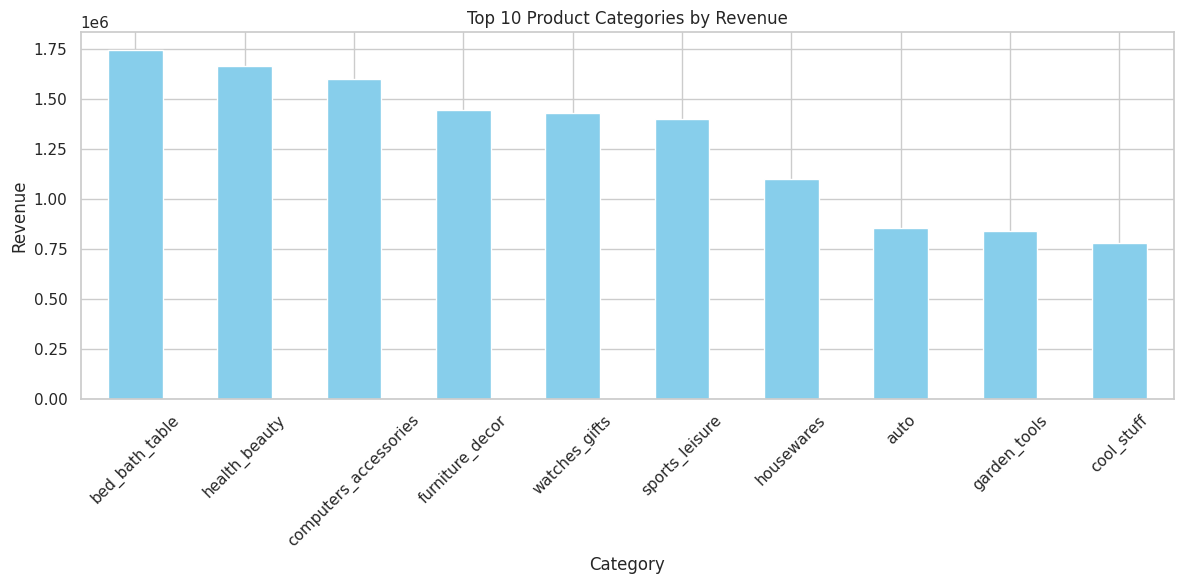

In [14]:
plt.figure(figsize=(12,6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Average Rating per Product / Category

Top 10 Products by Average Rating:
product_id
000b8f95fcb9e0096488278317764d19    5.0
fffdb2d0ec8d6a61f0a0a0db3f25b441    5.0
00066f42aeeb9f3007548bb9d3f33c38    5.0
fff9553ac224cec9d15d49f5a263411f    5.0
ffd9ac56db9194a413298faaa03cd176    5.0
ffd7628b0b0b98ebc549e8e4c54a59af    5.0
ffd63ee42a5c8cc5a15a1c8e2aa50011    5.0
000d9be29b5207b54e86aa1b1ac54872    5.0
8aebbc3445bef4a356ae41d226a7b5da    5.0
8aeef27d525d6bfa3b48e599a6c15ffd    5.0
Name: review_score, dtype: float64

Top 10 Categories by Average Rating:
product_category_name_english
cds_dvds_musicals                        4.642857
fashion_childrens_clothes                4.500000
books_general_interest                   4.438503
books_imported                           4.419355
flowers                                  4.419355
costruction_tools_tools                  4.415842
books_technical                          4.375465
food_drink                               4.324138
small_appliances_home_oven_and_coffee    4.320513
l

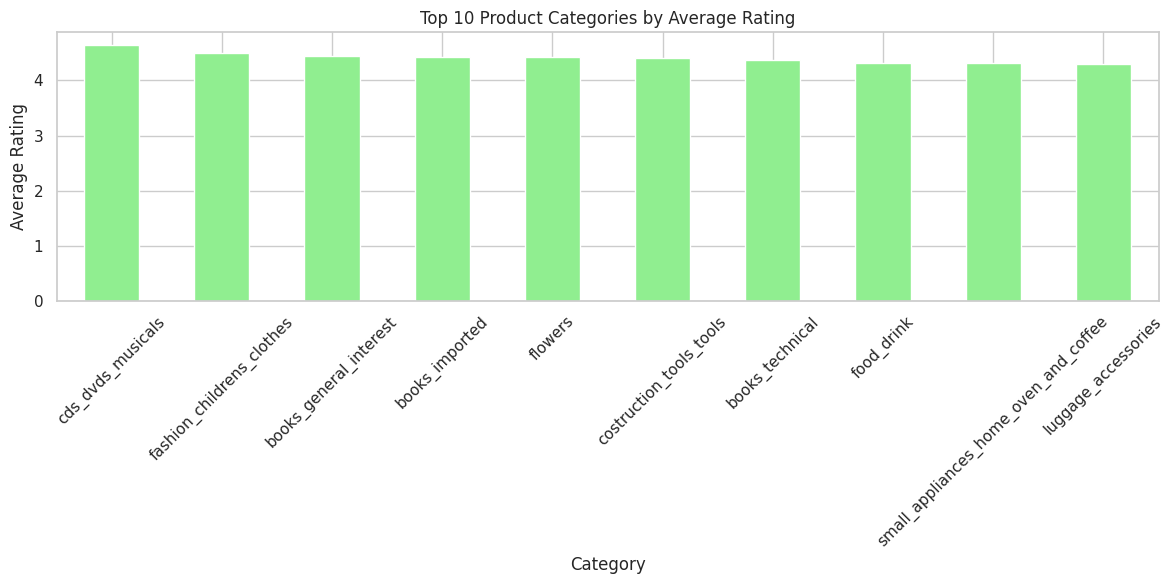

In [15]:
# Average rating per product
avg_rating_product = df.groupby('product_id')['review_score'].mean().sort_values(ascending=False).head(10)
print("Top 10 Products by Average Rating:")
print(avg_rating_product)

# Average rating per category
avg_rating_category = df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Categories by Average Rating:")
print(avg_rating_category)

# Visualization: category ratings
plt.figure(figsize=(12,6))
avg_rating_category.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Product Categories by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Quantity Sold per Product / Category

Top 10 Products by Quantity Sold:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    536
99a4788cb24856965c36a24e339b6058    528
422879e10f46682990de24d770e7f83d    508
389d119b48cf3043d311335e499d9c6b    406
368c6c730842d78016ad823897a372db    398
53759a2ecddad2bb87a079a1f1519f73    391
d1c427060a0f73f6b889a5c7c61f2ac4    357
53b36df67ebb7c41585e8d54d6772e08    327
154e7e31ebfa092203795c972e5804a6    295
3dd2a17168ec895c781a9191c1e95ad7    278
Name: order_item_id, dtype: int64

Top 10 Categories by Quantity Sold:
product_category_name_english
bed_bath_table           11988
health_beauty            10032
sports_leisure            9004
furniture_decor           8832
computers_accessories     8150
housewares                7380
watches_gifts             6213
telephony                 4726
garden_tools              4590
auto                      4400
Name: order_item_id, dtype: int64


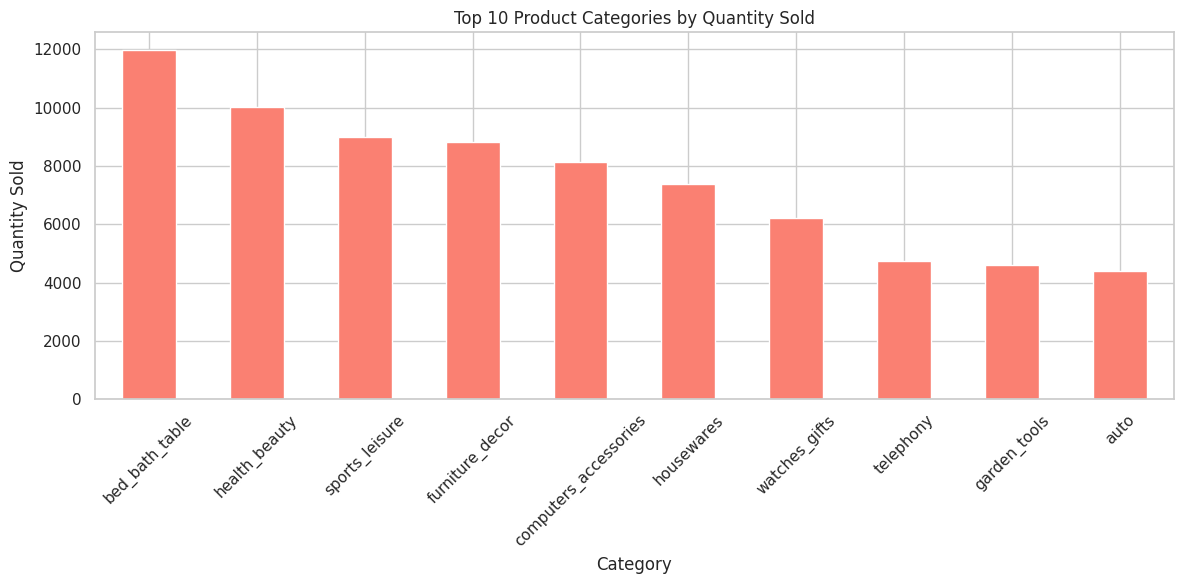

In [16]:
# Count of items sold per product
quantity_product = df.groupby('product_id')['order_item_id'].count().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(quantity_product)

# Count of items sold per category
quantity_category = df.groupby('product_category_name_english')['order_item_id'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Categories by Quantity Sold:")
print(quantity_category)

# Visualization: category quantity
plt.figure(figsize=(12,6))
quantity_category.plot(kind='bar', color='salmon')
plt.title('Top 10 Product Categories by Quantity Sold')
plt.ylabel('Quantity Sold')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
